# LightGBM

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
y = df["Outcome"]
X = df.drop("Outcome", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [4]:
model = LGBMClassifier().fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7229437229437229

In [5]:
tuned_parameters = {
    "learning_rate": [0.001,0.01,0.1],
    "n_estimators": [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    "max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10],
}
model = LGBMClassifier()
model_cv = GridSearchCV(model, tuned_parameters, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 270 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 538 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 1104 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done 1709 tasks      | elapsed:   48.8s
[Parallel(n_jobs=-1)]: Done 2352 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed:  1.3min finished


In [6]:
best = model_cv.best_estimator_
model_cv.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 400}

In [7]:
model_tuned = LGBMClassifier(learning_rate=best.learning_rate, 
                             max_depth=best.max_depth, 
                             n_estimators=best.n_estimators).fit(X_train, y_train)

y_pred = model_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7619047619047619

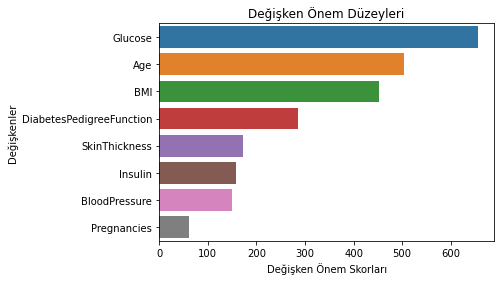

In [8]:
feature_imp = pd.Series(model_tuned.feature_importances_, index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Değişken Önem Düzeyleri")
plt.xlabel("Değişken Önem Skorları")
plt.ylabel("Değişkenler")
plt.show()